In [2]:
%autosave 10

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [3]:
import pandas as pd
data = pd.read_csv('cleaned_data.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [4]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'others', 'university'],
      dtype='object')

In [7]:
X=data.loc[:,~data.columns.isin(['default payment next month','EDUCATION_CAT','ID'])]
y=data['default payment next month']
X,y

(       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
 0          20000    2          2         1   24      2      2     -1     -1   
 1         120000    2          2         2   26     -1      2      0      0   
 2          90000    2          2         2   34      0      0      0      0   
 3          50000    2          2         1   37      0      0      0      0   
 4          50000    1          2         1   57     -1      0     -1      0   
 ...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
 26659     220000    1          3         1   39      0      0      0      0   
 26660     150000    1          3         2   43     -1     -1     -1     -1   
 26661      30000    1          2         2   37      4      3      2     -1   
 26662      80000    1          3         1   41      1     -1      0      0   
 26663      50000    1          2         1   46      0      0      0      0   
 
        PAY_5  ...  PAY_AMT1  PAY_AMT2

In [8]:
print(X.shape)
print(y.shape)

(26664, 27)
(26664,)


In [14]:
from sklearn import preprocessing
import numpy as np
X = preprocessing.StandardScaler().fit(X).transform(X)
y=np.asarray(y)

In [23]:
# ONLY CONSIDERING THE LIMIT BAL AS THE INDEPENDENT VARIABLE UPON WHICH THE DEPENDENT VARIABLE DEFAULT PAYMMNT NEXT MONHT DEPENND
import numpy as np
from sklearn.model_selection import train_test_split
#X = data['LIMIT_BAL']
#y = data['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((19998, 27), (6666, 27), (19998,), (6666,))

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='saga',n_jobs=-1,max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [25]:
pred_prob = model.predict_proba(X_test)
pred_prob 

array([[0.93646539, 0.06353461],
       [0.89431757, 0.10568243],
       [0.89669286, 0.10330714],
       ...,
       [0.95200014, 0.04799986],
       [0.61406161, 0.38593839],
       [0.6324612 , 0.3675388 ]])

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_test, pred_prob[:,1])
auc_score

0.7220601649444147

_________________________________________________________________________
**Now, plot the ROC curve.**


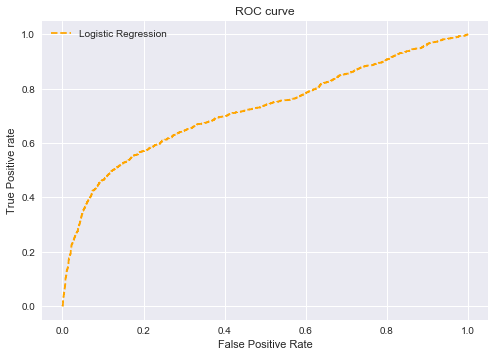

In [27]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [41]:
pred_prob = model.predict_proba(X_test)
pred_prob 

array([[0.93646539, 0.06353461],
       [0.89431757, 0.10568243],
       [0.89669286, 0.10330714],
       ...,
       [0.95200014, 0.04799986],
       [0.61406161, 0.38593839],
       [0.6324612 , 0.3675388 ]])

In [44]:
precision, recall, _ = precision_recall_curve(y_test, pred_prob[:,1])
precision, recall, _

(array([0.22030335, 0.22018624, 0.22021932, ..., 0.5       , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99318337e-01, 9.99318337e-01, ...,
        6.81663258e-04, 6.81663258e-04, 0.00000000e+00]),
 array([0.00339161, 0.00401391, 0.00447061, ..., 0.99132745, 0.99178562,
        0.99268852]))

In [45]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, pred_prob[:,1])# in place of pred_prob predict or y_pred can also be used

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.51


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.51')

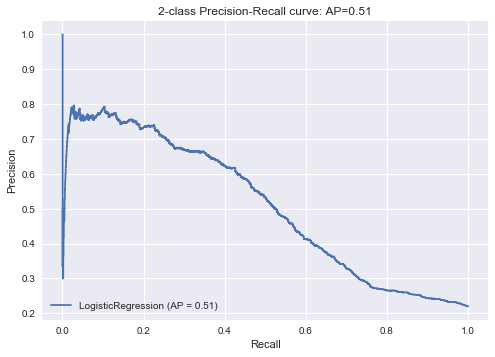

In [46]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [47]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('Logistic Precision-Recall AUC: ',auc_score)

Logistic Precision-Recall AUC:  0.5061588572825495


_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [48]:
pred_prob = model.predict_proba(X_train)
pred_prob 

array([[0.50047203, 0.49952797],
       [0.90018904, 0.09981096],
       [0.62180727, 0.37819273],
       ...,
       [0.59337631, 0.40662369],
       [0.85266826, 0.14733174],
       [0.76240505, 0.23759495]])

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresh = roc_curve(y_train, pred_prob[:,1], pos_label=1)
auc_score = roc_auc_score(y_train, pred_prob[:,1])
auc_score

0.7257034410538357

    How is this different, conceptually and quantitatively, from your earlier calculation?
